In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("C:/Users/19452/Downloads/Air_line_Delay_Cause.csv")

# Data Preprocessing: Convert categorical variables to numeric
label_encoder = LabelEncoder()
df['carrier'] = label_encoder.fit_transform(df['carrier'])
df['airport'] = label_encoder.fit_transform(df['airport'])

# Fill any missing values with zero
df.fillna(0, inplace=True)


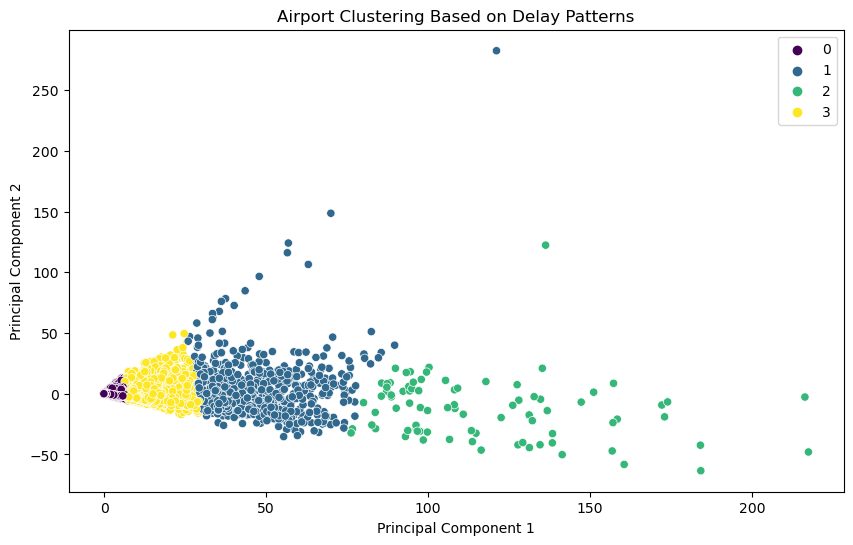

In [2]:
# Define features for clustering
features = [ 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

# Visualize Clustering Results using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title("Airport Clustering Based on Delay Patterns")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


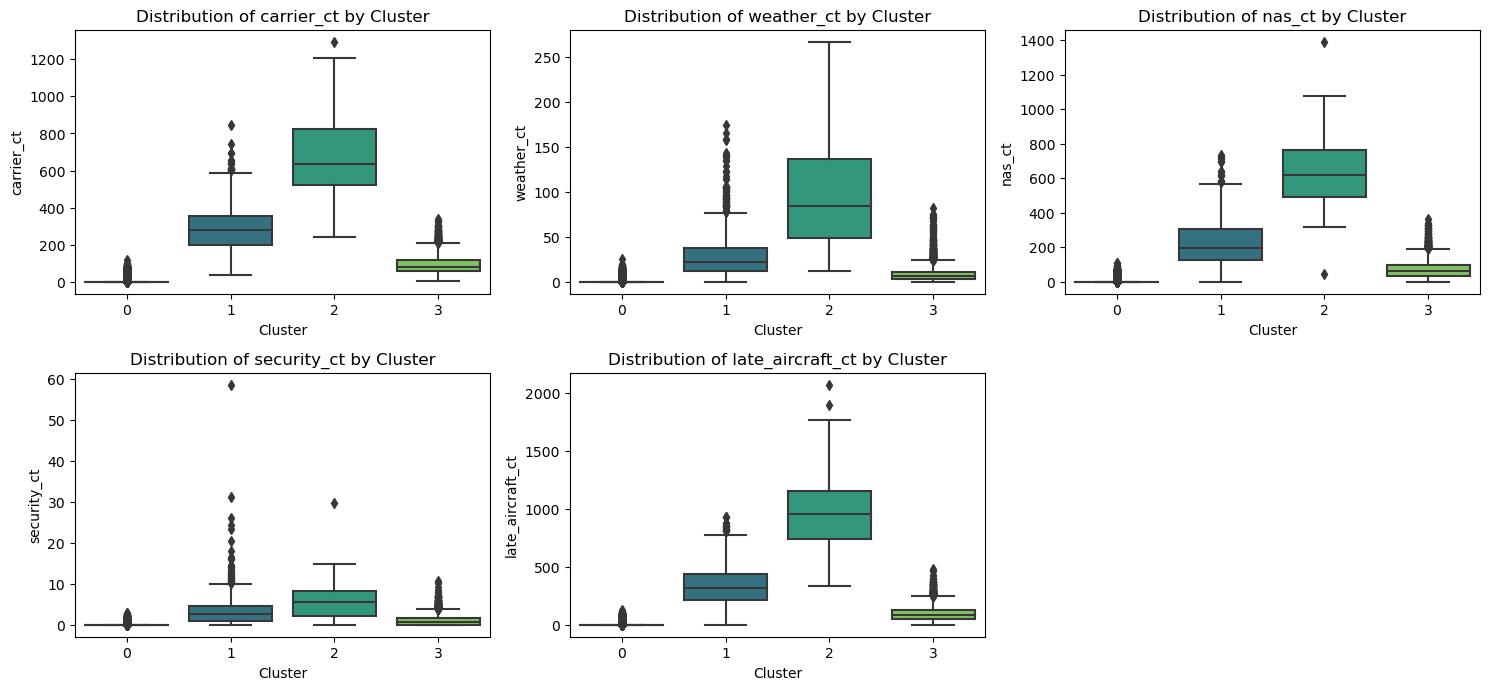

In [3]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='cluster', y=feature, data=df, palette='viridis')
    plt.title(f"Distribution of {feature} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


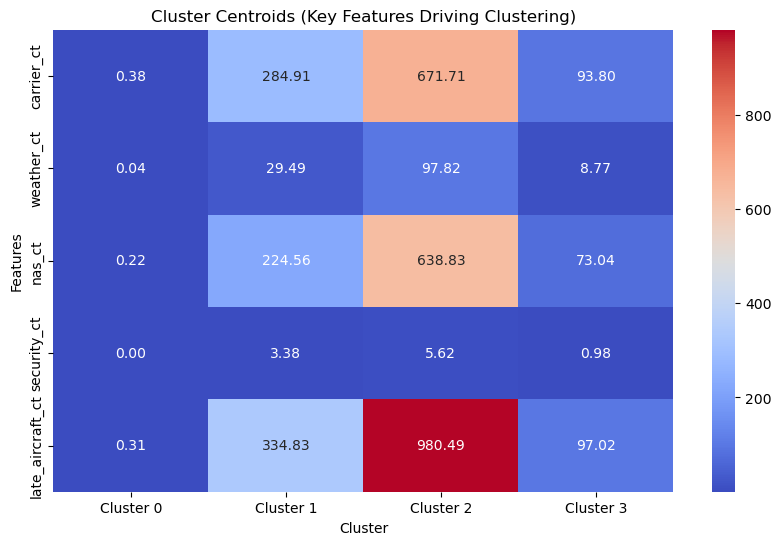

In [4]:
# Get cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=features)

plt.figure(figsize=(10, 6))
sns.heatmap(centroid_df.T, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title("Cluster Centroids (Key Features Driving Clustering)")
plt.xlabel("Cluster")
plt.ylabel("Features")
plt.show()


<Figure size 1200x800 with 0 Axes>

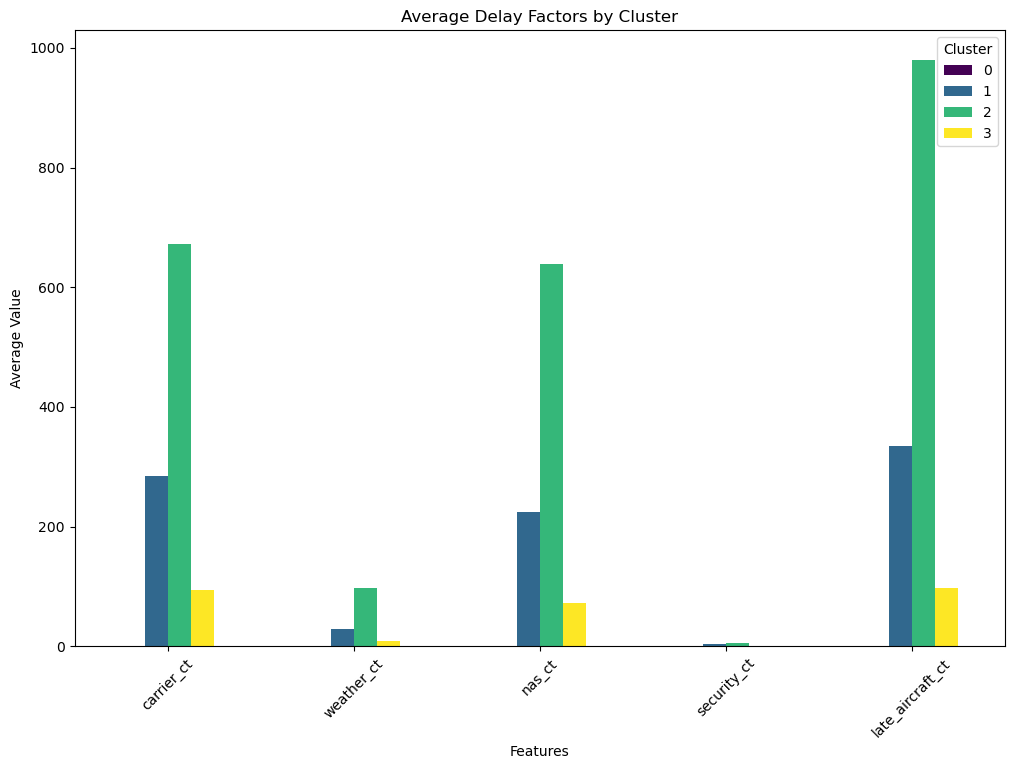

In [7]:
cluster_averages = df.groupby('cluster')[features].mean()

plt.figure(figsize=(12, 8))
cluster_averages.T.plot(kind='bar', figsize=(12, 8), cmap='viridis')
plt.title("Average Delay Factors by Cluster")
plt.xlabel("Features")
plt.ylabel("Average Value")
plt.legend(title="Cluster", loc='upper right')
plt.xticks(rotation=45)
plt.show()


In [9]:
# Count of airports in each cluster
print(df['cluster'].value_counts())


0    1044157
3       3481
1        854
2         83
Name: cluster, dtype: int64


# Cluster Analysis of Airports

## **Cluster 0**
### Key Characteristics:
- Very low values for `carrier_ct` (carrier delays), `weather_ct` (weather delays), and `nas_ct` (National Aviation System delays).
- Minimal `security_ct` (security delays).
- Low `late_aircraft_ct` (late aircraft delays).

### Interpretation:
- Airports in this cluster have **minimal delays across all categories**. These might be **small regional airports** or **well-managed airports** with efficient operations and fewer flights.

---

## **Cluster 1**
### Key Characteristics:
- Moderate `carrier_ct` (carrier delays) and `nas_ct` (National Aviation System delays).
- Slightly higher `late_aircraft_ct` compared to Cluster 0.
- Moderate `weather_ct`.

### Interpretation:
- Airports in this cluster experience **moderate delays**, primarily driven by **carrier issues** (airline operations) and **air traffic congestion (NAS)**.
- These might be **medium-sized airports** or airports that handle a **moderate number of flights**.

---

## **Cluster 2**
### Key Characteristics:
- Extremely high `carrier_ct` (carrier delays) and `nas_ct` (National Aviation System delays).
- Highest `late_aircraft_ct` among all clusters.
- Significant `weather_ct` compared to other clusters.

### Interpretation:
- Airports in this cluster experience **severe delays**, driven by a combination of **carrier inefficiencies**, **late aircraft**, and **air traffic congestion**.
- These might be **major hub airports** or airports in **densely populated regions** with high traffic and operational challenges (e.g., **New York JFK**, **Atlanta Hartsfield-Jackson**).

---

## **Cluster 3**
### Key Characteristics:
- Low delays across all categories, similar to Cluster 0.
- Slightly higher values for `carrier_ct` and `late_aircraft_ct` compared to Cluster 0.
- Minimal `weather_ct`, `nas_ct`, and `security_ct`.

### Interpretation:
- Airports in this cluster are likely **smaller airports with minor delays**, possibly due to **occasional issues** like late aircraft arrivals or minor carrier-related issues.

---

## **Comparison Across Clusters**

| **Cluster** | **Key Features Driving Delays**                           | **Possible Airport Types**                             |
|-------------|-----------------------------------------------------------|-------------------------------------------------------|
| **Cluster 0** | Minimal delays across all factors                        | Small regional airports or efficient operations       |
| **Cluster 1** | Moderate NAS and carrier delays                          | Medium-sized airports with moderate traffic           |
| **Cluster 2** | Severe delays in carrier, NAS, and late aircraft         | Large hub airports with operational challenges        |
| **Cluster 3** | Low delays with minor late aircraft delays               | Small airports with occasional issues                |

---

## **Key Insights**

### **Cluster 2 (High-Delay Airports):**
- These are the airports that require **operational improvements** in **carrier efficiency**, **air traffic management**, and **scheduling** to reduce cascading delays caused by late aircraft.

### **Cluster 0 & 3 (Low-Delay Airports):**
- These airports can serve as **models for best practices** in efficient airport operations.

### **Cluster 1 (Moderate-Delay Airports):**
- Airports in this cluster may need **targeted interventions** for specific delay factors (e.g., improving **NAS** and **carrier operations**).
